In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

1. Data Collection & Exploration

In [2]:
data_train_path = '../Fruits_Vegetables/train'
data_test_path = '../Fruits_Vegetables/test'
data_validation_path = '../Fruits_Vegetables/validation'

In [3]:
img_width = 180
img_height = 180
#Using TensorFlow's `image_dataset_from_directory` function to create a dataset of images for training a machine learning model. 
data_train  = tf.keras.utils.image_dataset_from_directory(
    data_train_path,
    shuffle = True,
    image_size = (img_width,img_height),
    batch_size = 32,
    validation_split = False 
)

Found 3115 files belonging to 36 classes.


In [4]:
data_category = data_train.class_names
data_category
#These are the classes to which the images belong.

['apple',
 'banana',
 'beetroot',
 'bell pepper',
 'cabbage',
 'capsicum',
 'carrot',
 'cauliflower',
 'chilli pepper',
 'corn',
 'cucumber',
 'eggplant',
 'garlic',
 'ginger',
 'grapes',
 'jalepeno',
 'kiwi',
 'lemon',
 'lettuce',
 'mango',
 'onion',
 'orange',
 'paprika',
 'pear',
 'peas',
 'pineapple',
 'pomegranate',
 'potato',
 'raddish',
 'soy beans',
 'spinach',
 'sweetcorn',
 'sweetpotato',
 'tomato',
 'turnip',
 'watermelon']

In [5]:
data_val = tf.keras.utils.image_dataset_from_directory(
    data_validation_path,
    shuffle = False,
    image_size = (img_width,img_height),
    batch_size = 32,
    validation_split = False 
    )

Found 351 files belonging to 36 classes.


In [6]:
data_test  =tf.keras.utils.image_dataset_from_directory(
    data_test_path,
    shuffle = False,
    image_size = (img_width,img_height),
    batch_size = 32,
    validation_split = False
)

Found 359 files belonging to 36 classes.


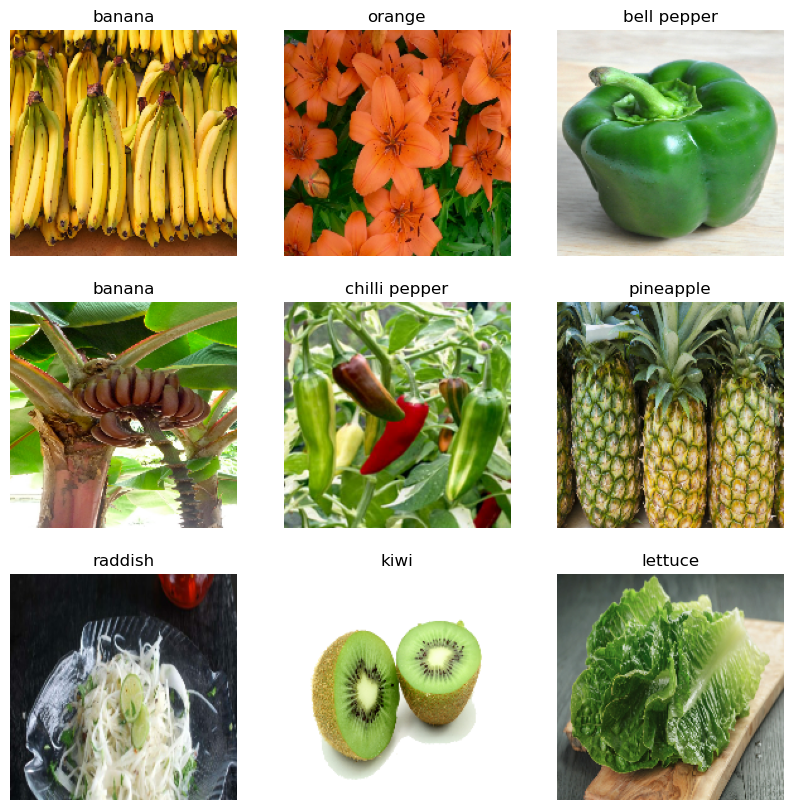

In [7]:
#Iterates through the first batch of images and label in the `data_train` dataset. For each image in the batch, plot a 3x3 grid of subplots and display the image along with its corresponding label from the `data_category` dictionary. The images are converted to numpy arrays and displayed as uint8 data type.
plt.figure(figsize=(10,10))
for image, labels in data_train.take(1):
    for i in range(9):
        plt.subplot(3,3,i+1)
        plt.imshow(image[i].numpy().astype('uint8'))
        plt.title(data_category[labels[i]])
        plt.axis('off')

In [8]:
from tensorflow.keras.models import Sequential

In [9]:
data_train

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 180, 180, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

2. Data preprocessing

In [10]:
rescale = Sequential([
    layers.Rescaling(1./255),
])

augmentation = Sequential([
    layers.RandomFlip("horizontal_and_vertical")
    #layers.RandomRotation(0.2)
])

3. Model Development & Optimization

In [11]:
model = Sequential([
    rescale,
    layers.Conv2D(16,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dropout(0.2),
    layers.Dense(128),
    layers.Dense(len(data_category))
])

In [12]:
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [13]:
epochs_size = 25
history = model.fit(data_train,validation_data=data_val, epochs=epochs_size)

Epoch 1/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 41s 399ms/step - accuracy: 0.0889 - loss: 3.4441 - val_accuracy: 0.3647 - val_loss: 2.5382
Epoch 2/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 33s 330ms/step - accuracy: 0.2976 - loss: 2.5052 - val_accuracy: 0.6268 - val_loss: 1.5492
Epoch 3/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 32s 324ms/step - accuracy: 0.5252 - loss: 1.7332 - val_accuracy: 0.8177 - val_loss: 0.8216
Epoch 4/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 32s 320ms/step - accuracy: 0.6970 - loss: 1.0592 - val_accuracy: 0.8519 - val_loss: 0.6016
Epoch 5/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 32s 325ms/step - accuracy: 0.8228 - loss: 0.6527 - val_accuracy: 0.9174 - val_loss: 0.4587
Epoch 6/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 33s 329ms/step - accuracy: 0.9014 - loss: 0.3705 - val_accuracy: 0.9430 - val_loss: 0.3806
Epoch 7/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 33s 329ms/step - accuracy: 0.9101 - loss: 0.3356 - val_accuracy: 0.9202 - val_loss: 0.3835
Epoch 8/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 33s 332ms/step - accuracy: 0.9445 - loss: 0.2290 - val_accu

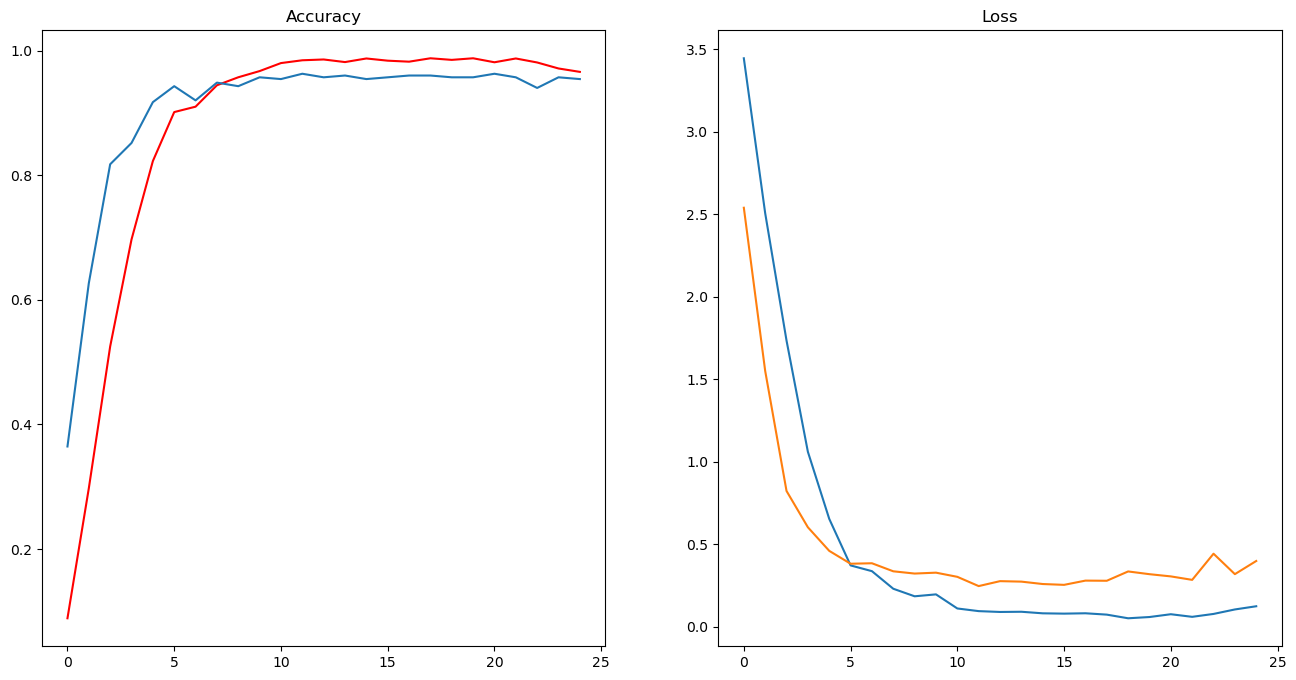

In [14]:
epochs_range = range(epochs_size)
plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
plt.plot(epochs_range,history.history['accuracy'],label='Training Accuracy',color='red')
plt.plot(epochs_range,history.history['val_accuracy'],label="Validation Accuracy")
plt.title('Accuracy')

plt.subplot(1,2,2)
plt.plot(epochs_range,history.history['loss'],label='Training Loss')
plt.plot(epochs_range,history.history['val_loss'],label="Validation Loss")
plt.title('Loss')
plt.show()


In [19]:
import numpy as np
from tensorflow.keras.models import load_model 

# true labels and prediction scores from the test set
y_true = []
y_pred_scores = []

# iterating over the test dataset
for images, labels in data_test:
    y_true.extend(labels.numpy())
    y_pred_scores.extend(model.predict(images)) 

# Convert lists to NumPy arrays
y_true = np.array(y_true)
y_pred_scores = np.array(y_pred_scores)
y_pred = np.argmax(y_pred_scores, axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 450ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 265ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


                  --- Classification Report ---                  
               precision    recall  f1-score   support

        apple       1.00      0.70      0.82        10
       banana       1.00      0.67      0.80         9
     beetroot       1.00      1.00      1.00        10
  bell pepper       0.90      0.90      0.90        10
      cabbage       0.91      1.00      0.95        10
     capsicum       0.91      1.00      0.95        10
       carrot       1.00      0.90      0.95        10
  cauliflower       1.00      1.00      1.00        10
chilli pepper       1.00      0.90      0.95        10
         corn       1.00      0.70      0.82        10
     cucumber       1.00      1.00      1.00        10
     eggplant       1.00      1.00      1.00        10
       garlic       0.91      1.00      0.95        10
       ginger       1.00      1.00      1.00        10
       grapes       1.00      1.00      1.00        10
     jalepeno       1.00      1.00      1.00        1

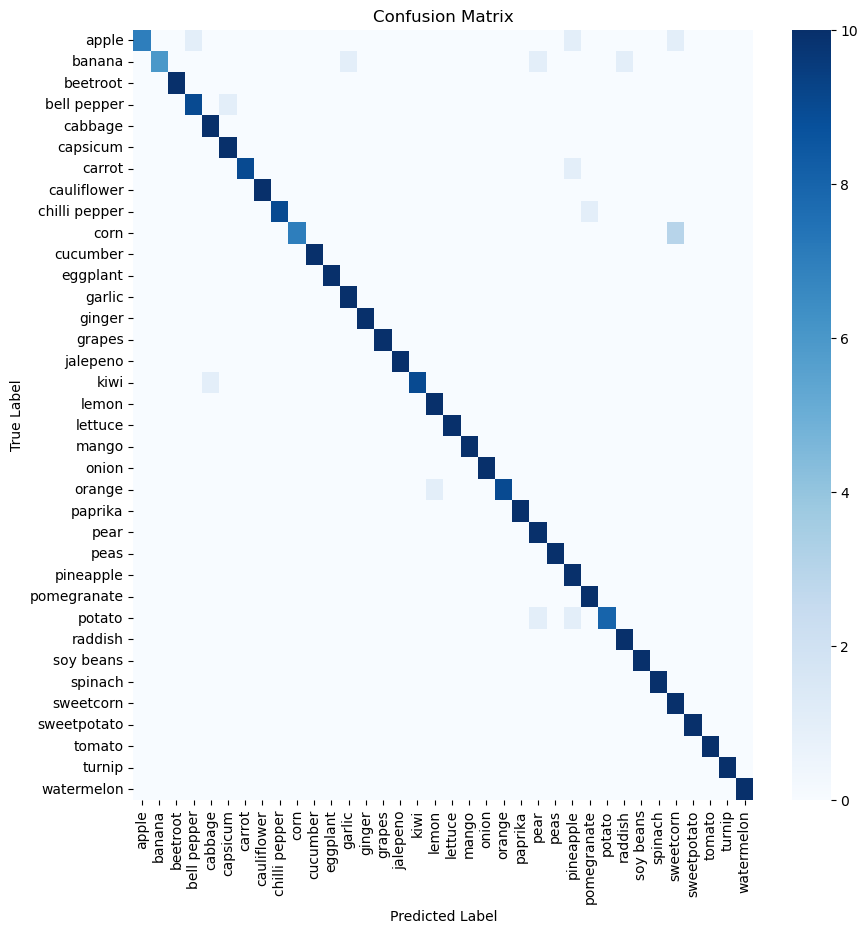

In [29]:
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

print("--- Classification Report ---".center(65))
print(classification_report(y_true, y_pred, target_names=data_category))

#confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot the confusion matrix 
plt.figure(figsize=(10, 10)) 
sns.heatmap(cm, annot=False,  cmap='Blues', xticklabels=data_category, yticklabels=data_category)
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

Testing

In [15]:
image = 'Image_6.JPG'
image = tf.keras.utils.load_img(image, target_size=(img_height,img_width))
img_arr = tf.keras.utils.array_to_img(image)
img_bat = tf.expand_dims(img_arr,0)

In [16]:
predict = model.predict(img_bat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


In [17]:
score = tf.nn.softmax(predict)
print('The image is {} with accuracy of {:0.2f}'.format(data_category[np.argmax(score)],np.max(score)*100))

The image is apple with accuracy of 99.87


Model export for deployment


In [18]:
model.save('Image_classifier.keras')